In [ ]:
import pandas as pd

# Had to load the dataset with a different encoding
df = pd.read_csv('airbnb_NYC.csv', encoding='latin1')

df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).astype(float)

missing_count = df['Price'].isnull().sum()

print(df['Price'].head())

0    145.0
1     37.0
2     28.0
3    199.0
4    549.0
Name: Price, dtype: float64


Q1.1: I ended up with 0 missing values for the Price variable. I removed the "dollar sign" and "," out of the dataset since prices over $999 have a comma. I also converted the column to floats.

In [ ]:
import pandas as pd

df_police = pd.read_csv('mn_police_use_of_force.csv')

missing_prop = df_police['subject_injury'].isnull().mean()
print(missing_prop*100)

df_police['subject_injury_cleaned'] = df_police['subject_injury'].fillna('Missing')
cross_tab = pd.crosstab(df_police['force_type'], df_police['subject_injury_cleaned'])
print(cross_tab)

76.19342359767892
subject_injury_cleaned       Missing    No   Yes
force_type                                      
Baton                              2     0     2
Bodily Force                    7051  1093  1286
Chemical Irritant               1421   131    41
Firearm                            0     2     0
Gun Point Display                 27    33    44
Improvised Weapon                 74    34    40
Less Lethal                       87     0     0
Less Lethal Projectile             0     1     2
Maximal Restraint Technique      170     0     0
Police K9 Bite                    31     2    44
Taser                            985   150   172


Q1.2: Approximately 76.19% of the values in subject_injury are missing. Their is a patten based on "force_type." "Chemical Irritant" and "Maximal Restrain Technique" have lots of missing injury data. These are both lower severity types compared to "Firearm" or "Less Lethal Projectile" that have a higher severity which have zero missing values. I also replaced all "NaN" values with the word "missing."

In [ ]:
df_meta = pd.read_csv('metabric.csv')

df_meta['Survival_Dummy'] = df_meta['Overall Survival Status'].map({'0:LIVING': 1, '1:DECEASED': 0})

print(df_meta[['Overall Survival Status', 'Survival_Dummy']].head())

  Overall Survival Status  Survival_Dummy
0                0:LIVING               1
1              1:DECEASED               0
2                0:LIVING               1
3              1:DECEASED               0
4              1:DECEASED               0


In [ ]:
missing_reviews = df['Review Scores Rating'].isnull().sum()
print(f"Missing Review Scores: {missing_reviews}")

median_val = df['Review Scores Rating'].median()
df['Review_Scores_Rating_Imputed'] = df['Review Scores Rating'].fillna(median_val)
print(f"Median used: {median_val}")

Missing Review Scores: 8323
Median used: 94.0


Q1.4: There are 8,323 missing review scores. Imputing with median 94 can bias the results since a lot of people skip reviews if they had a bad experience so filling the gaps with 94 will falsely inflate the data.

In [ ]:
df_shark = pd.read_excel('GSAF5.xls')

In [ ]:
df_shark = df_shark.dropna(axis=1, how='all')

Q2.3: An observation represents a unique reported shark attack incident. Each row contains a specific location, date, and victim corresponding to one event. It affects the cleaning since if one incident involved multiple people, it may be recorded as multiple rows.

In [ ]:
df_shark['Year'] = pd.to_numeric(df_shark['Year'], errors='coerce')
df_modern = df_shark[df_shark['Year'] >= 1940]

Q2.4: The number of attacks will likely increase over time since there will be better reporting technology and a larger human population.

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1543842456.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_shark['Age'] = df_shark['Age'].astype(str).str.extract('(\d+)').astype(float)


<Axes: title={'center': 'Age of Shark Attack Victims'}, ylabel='Frequency'>

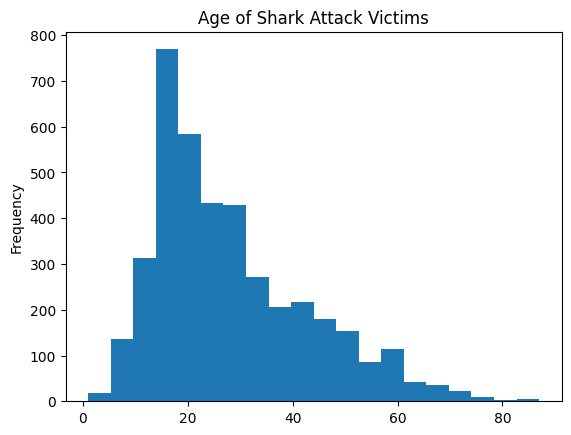

In [ ]:
df_shark['Age'] = df_shark['Age'].astype(str).str.extract('(\d+)').astype(float)
df_shark['Age'].plot(kind='hist', bins=20, title='Age of Shark Attack Victims')

In [ ]:
def clean_type(x):
    x = str(x).strip().capitalize()
    if x in ['Provoked', 'Unprovoked']:
        return x
    else:
        return 'Unknown'

df_shark['Type'] = df_shark['Type'].apply(clean_type)
print(df_shark['Type'].value_counts(normalize=True))

Type
Unprovoked    0.738762
Unknown       0.170201
Provoked      0.091038
Name: proportion, dtype: float64


In [ ]:
def clean_fatal(x):
    x = str(x).strip().upper()
    if x == 'Y': return 'Y'
    if x == 'N': return 'N'
    return 'Unknown'

df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].apply(clean_fatal)

In [ ]:
pd.crosstab(df_shark['Type'], df_shark['Fatal Y/N'], normalize='index')

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742250,0.015117,0.242633


Q2.8: Unprovoked attacks are generally more likely to be fatal rather than provoked ones. A provoked attack often occurs when a human does something to a shark leading to a defensive bite from the shark while an unprovoked attack are test bites in deeper water which are worse bites.

Q3.1: The paper talks about the amount of effort spent on data cleaning and introduces the concept of "data tidying" as a way to structure datasets to they are easier to work with.

Q3.2: The Tidy Data Standard is intended to structure datasets to improve analysis by implementing a consistent organizational standard. This simplifies the development od data analysis tools that will now be able to work together without needing constant re-formatting.

Q3.3: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that all tidy datasets follow the same uniform structure while messy datasets can be messy in a ton of different ways.

"For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" refers to the idea that we always recognize a "row" and a "column," but finding a universal definition for them that applies to every possible data type is difficult.

Q3.4: He defines a variable as a quantity, quality, or property that can be measured. He defines an observation as a set of measurements made under similar conditions on the same object at the same time. He defines a value as a specific state of a variable when it is measured for a particular observation.

Q3.5: Tidy Data is defined as having three rules: Each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

Q3.6: The 5 most common problems with messy datasets are column headers are values, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables.

Table 4 is messy because the column headers are values. For example, $10k and $20k are headers, rather than variable names.

Melting is the process of turning columns into rows to make a tidy dataset.

Q3.7: Table 11 is  messy because there are variables stored in both rows and columns. Table 12 is tidy and "molten" because every row is a single observation and every column is a distinct variable.

In [ ]:
df_gifts = pd.read_csv('ForeignGifts_edu.csv')

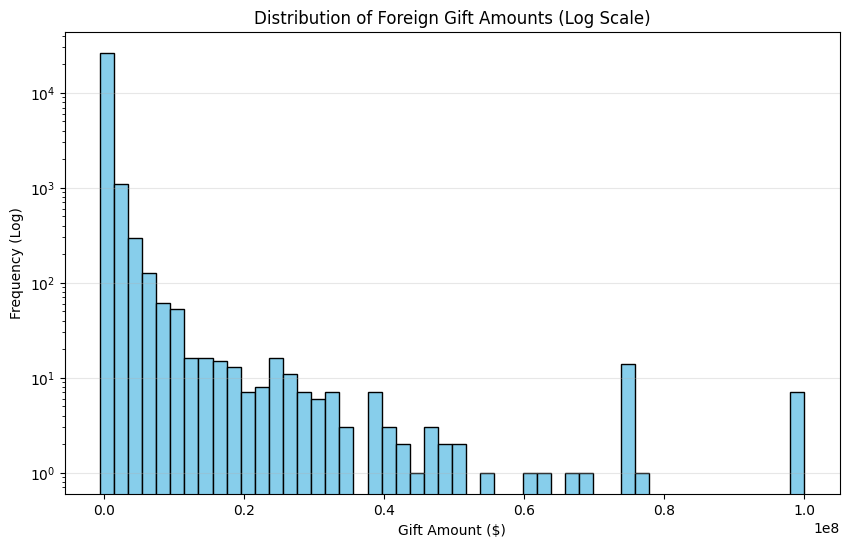

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_gifts['Foreign Gift Amount'], bins=50, edgecolor='black', color='skyblue')
plt.yscale('log')
plt.title('Distribution of Foreign Gift Amounts (Log Scale)')
plt.xlabel('Gift Amount ($)')
plt.ylabel('Frequency (Log)')
plt.grid(axis='y', alpha=0.3)
plt.show()

Q4.2: The Foreign Gift Amount variable is right-skewed with the maximumn gift recorded at 100,000,000.00.

In [ ]:
gift_type_counts = df_gifts['Gift Type'].value_counts()
gift_type_proportions = df_gifts['Gift Type'].value_counts(normalize=True)
print(gift_type_proportions)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


In [ ]:
top_countries_count = df_gifts['Country of Giftor'].value_counts().head(15)
print(top_countries_count)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


In [ ]:
top_countries_amount = df_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_countries_amount)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [ ]:
top_institutions = df_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_institutions)

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


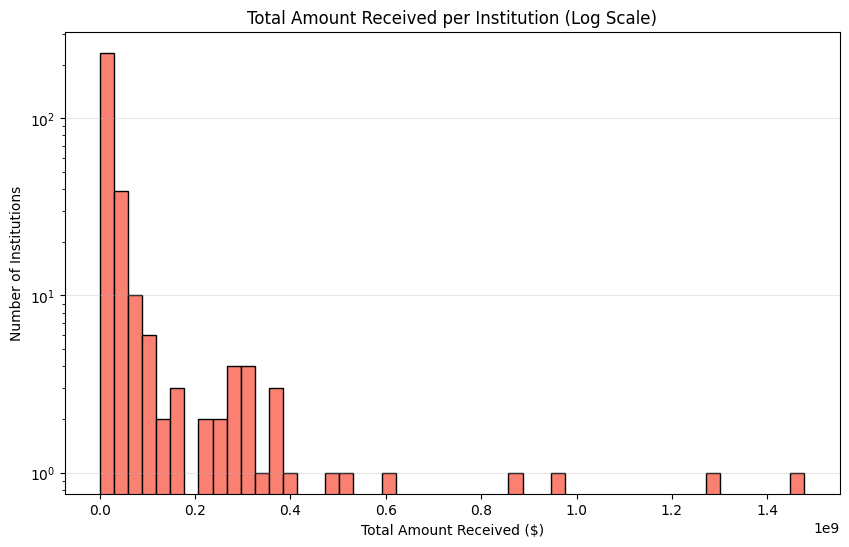

In [ ]:
inst_totals = df_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
plt.hist(inst_totals, bins=50, edgecolor='black', color='salmon')
plt.yscale('log')
plt.title('Total Amount Received per Institution (Log Scale)')
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
top_giftors = df_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(10)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Name: Foreign Gift Amount, dtype: int64


In [39]:
import seaborn as sns
df_col = pd.read_csv('college_completion.csv')

In [38]:
df_col.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [41]:
print(f"Observations: {df_col.shape[0]}")
print(f"Variables: {df_col.shape[1]}")

Observations: 3798
Variables: 63


In [42]:
ct = pd.crosstab(df_col['control'], df_col['level'])
print(ct)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Q5.3: Some of the patterns I observed are that Private not-for-profit institutions have way more 4 year colleges than 2 year colleges. Also, public institutions ahve the highest number of 2-year colleges.

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


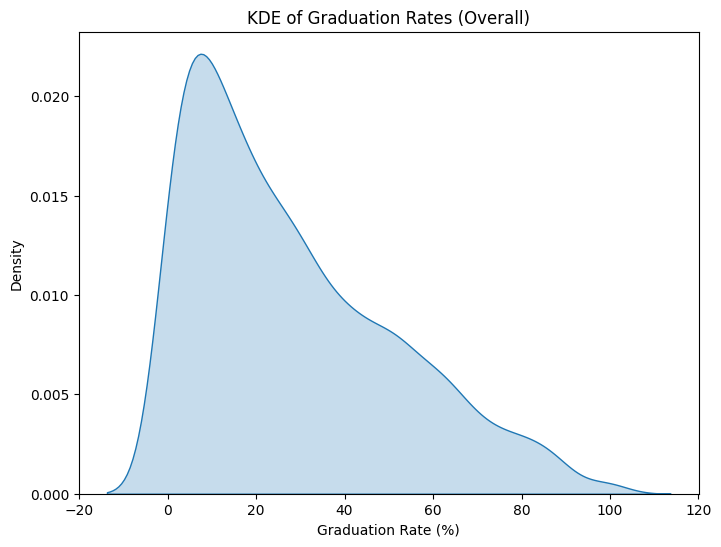

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


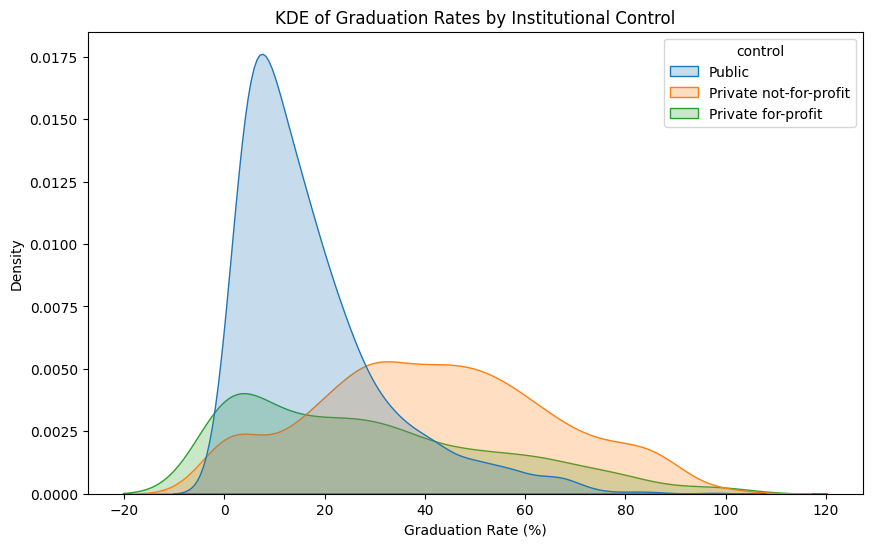

In [43]:
print(df_col['grad_100_value'].describe())

plt.figure(figsize=(8, 6))
sns.kdeplot(df_col['grad_100_value'], fill=True)
plt.title('KDE of Graduation Rates (Overall)')
plt.xlabel('Graduation Rate (%)')
plt.show()

print(df_col.groupby('control')['grad_100_value'].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_col, x='grad_100_value', hue='control', fill=True)
plt.title('KDE of Graduation Rates by Institutional Control')
plt.xlabel('Graduation Rate (%)')
plt.show()

Q4.4: Private not-for-profit institutions appear to have the most favorable graduation rates.  

                grad_100_value     aid_value
grad_100_value      543.483382  8.861048e+04
aid_value         88610.483169  4.121201e+07
                grad_100_value  aid_value
grad_100_value        1.000000   0.575879
aid_value             0.575879   1.000000


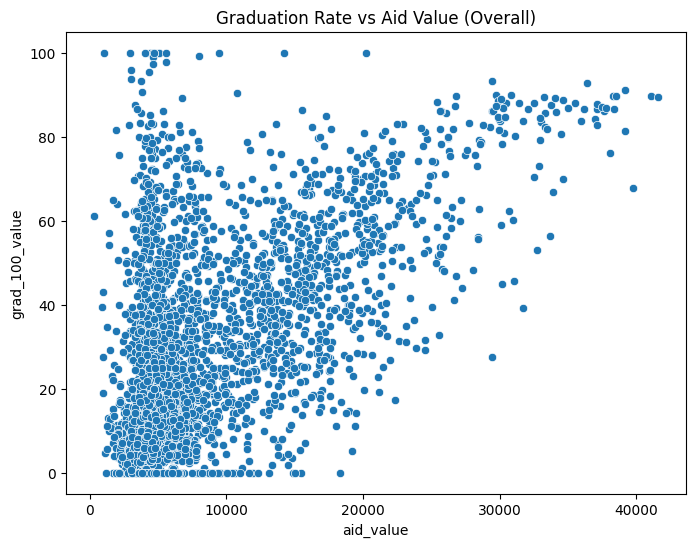

Covariance:
                grad_100_value     aid_value
grad_100_value      655.446387  6.897525e+03
aid_value          6897.524957  1.957540e+06
Correlation:
                grad_100_value  aid_value
grad_100_value        1.000000   0.188363
aid_value             0.188363   1.000000
Covariance:
                grad_100_value     aid_value
grad_100_value      554.660462  1.092741e+05
aid_value        109274.123337  6.041488e+07
Correlation:
                grad_100_value  aid_value
grad_100_value        1.000000   0.601591
aid_value             0.601591   1.000000
Covariance:
                grad_100_value     aid_value
grad_100_value      216.956489  1.535515e+04
aid_value         15355.146212  4.564360e+06
Correlation:
                grad_100_value  aid_value
grad_100_value        1.000000   0.482481
aid_value             0.482481   1.000000


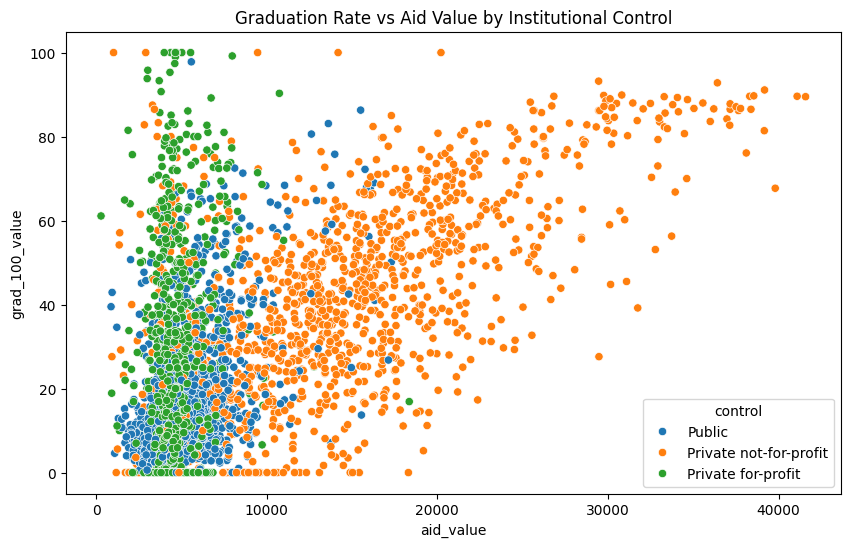

In [44]:
print(df_col[['grad_100_value', 'aid_value']].cov())

print(df_col[['grad_100_value', 'aid_value']].corr())

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_col, x='aid_value', y='grad_100_value')
plt.title('Graduation Rate vs Aid Value (Overall)')
plt.show()

for name, group in df_col.groupby('control'):
    print(f"Covariance:\n{group[['grad_100_value', 'aid_value']].cov()}")
    print(f"Correlation:\n{group[['grad_100_value', 'aid_value']].corr()}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_col, x='aid_value', y='grad_100_value', hue='control')
plt.title('Graduation Rate vs Aid Value by Institutional Control')
plt.show()

Q5.5: There is moderate positive relationship in my first calculation. Private not-for-profit institutions show the strongest positive relationship between aid and graduation rates. Private for-profit institutions show the weakest relationship showing that higher aid at these institutions does not correlate with a 100% graduation rate.

In [45]:
from scipy.stats.mstats import winsorize
df_ames = pd.read_csv('ames_prices.csv')

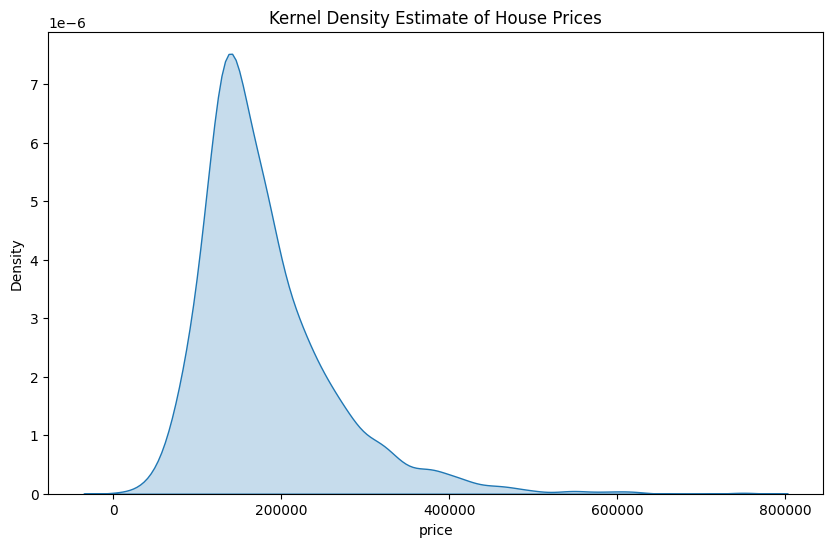

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


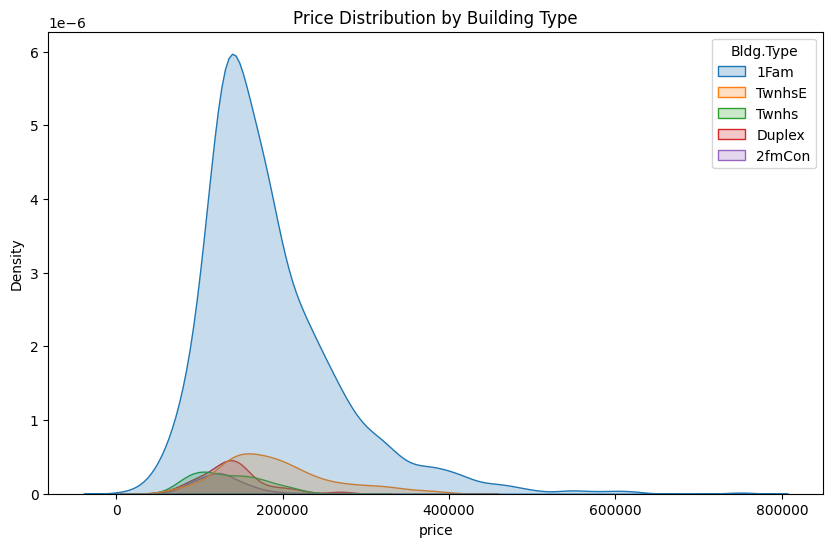

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [47]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_ames, x='price', fill=True)
plt.title('Kernel Density Estimate of House Prices')
plt.show()
print(df_ames['price'].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_ames, x='price', hue='Bldg.Type', fill=True)
plt.title('Price Distribution by Building Type')
plt.show()

type_summary = df_ames.groupby('Bldg.Type')['price'].describe()
print(type_summary)

Q7.2: The most expensive building on average is the TwnhsE followed by 1Fam. The 1Fam has the highest variance in transaction prices.

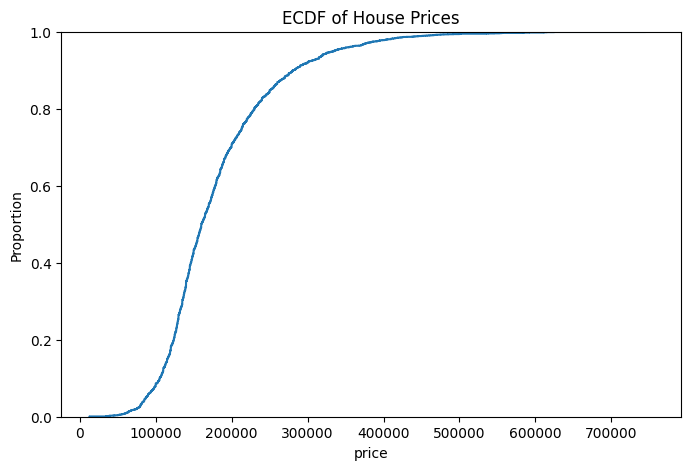

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


In [50]:
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=df_ames, x='price')
plt.title('ECDF of House Prices')
plt.show()

five_num = df_ames['price'].quantile([0, 0.25, 0.5, 0.75, 1])
print(five_num)

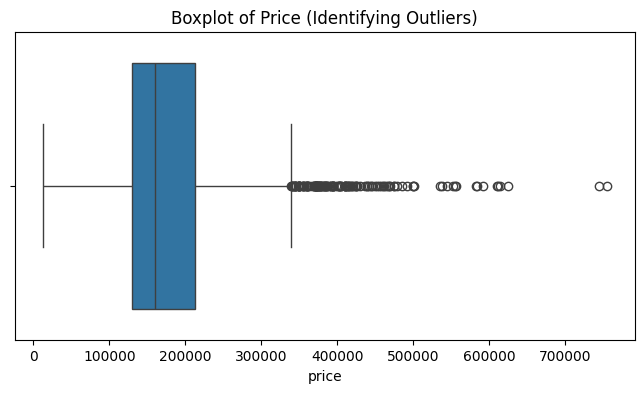

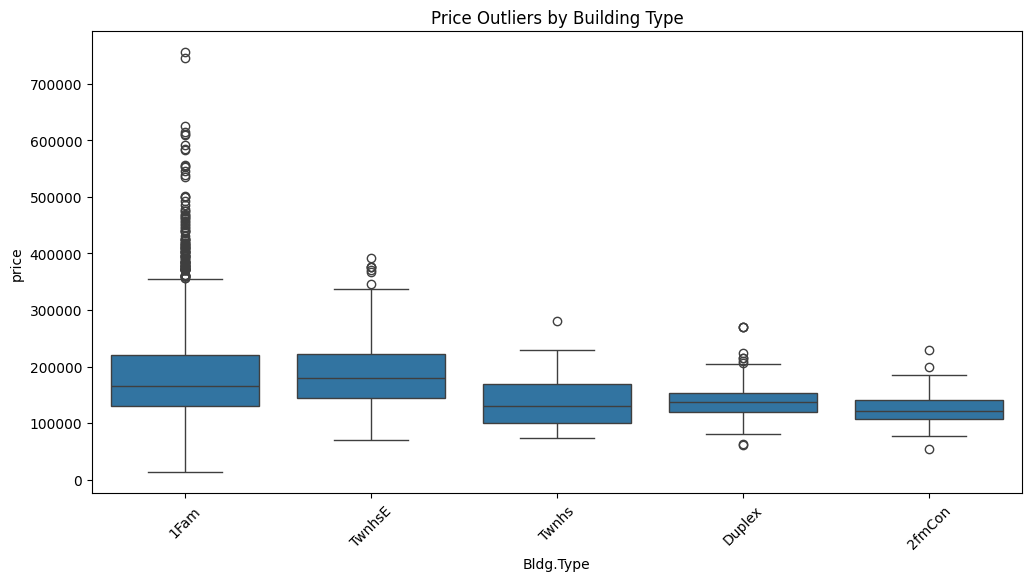

In [51]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_ames['price'])
plt.title('Boxplot of Price (Identifying Outliers)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ames, x='Bldg.Type', y='price')
plt.title('Price Outliers by Building Type')
plt.xticks(rotation=45)
plt.show()

Q7.4: The boxplot shows a significant number of outliers on the higher end of price. The single family homes have the most extreme outliers while 2fmCon and Duplex types have much tigher distributions and fewer outliers.

In [55]:
Q1 = df_ames['price'].quantile(0.25)
Q3 = df_ames['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 1 if outlier, 0 if not
df_ames['is_outlier'] = ((df_ames['price'] < lower_bound) | (df_ames['price'] > upper_bound)).astype(int)
print(f"\nNumber of outliers detected: {df_ames['is_outlier'].sum()}")


Number of outliers detected: 137


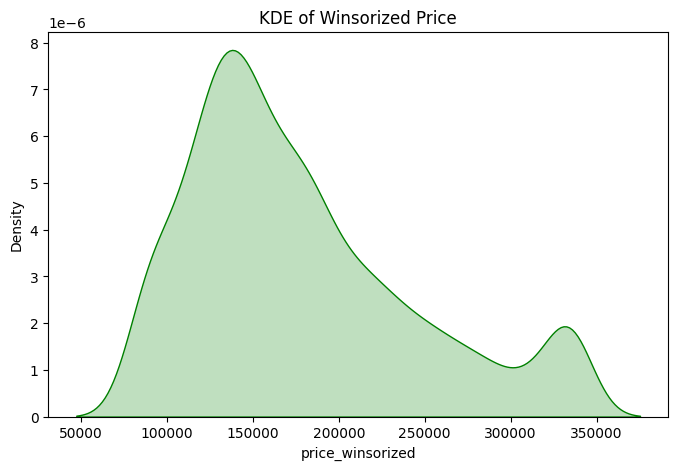

count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsorized, dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [56]:
df_ames['price_winsorized'] = winsorize(df_ames['price'], limits=[0.05, 0.05])

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_ames, x='price_winsorized', fill=True, color='green')
plt.title('KDE of Winsorized Price')
plt.show()

print(df_ames['price_winsorized'].describe())

Q7.6: The original mean changed from 180,796 to 177,633. The original Std Dev changed from 79,887 to 66,195. The range was also compressed to a much narrow price range. Winsorizing significantly helped fix the right skew of the distribution which makes the mean more representative of the dataset as a whole.